# Домашнее задание (титаник) 2

## 1. Загрузка данных

### Загрузим тренирововчную выборку

In [197]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import re
import collections
plt.rcParams['figure.figsize'] = (10, 6)

In [198]:
titanic_data_train = pd.read_csv('train.csv')
titanic_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
titanic_data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [200]:
titanic_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Загрузим тестовую выборку

In [201]:
titanic_data_test = pd.read_csv('test.csv')
titanic_data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [202]:
titanic_data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [203]:
titanic_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [204]:
titanic_data_test[titanic_data_test['Age'].isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S


### Создадим единый фрейм для обеих выборок

In [205]:
titanic_data = titanic_data_train.append(titanic_data_test)

In [206]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [207]:
titanic_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


### Пропуски данных

## 2. Предобработка данных

### Заполним Age

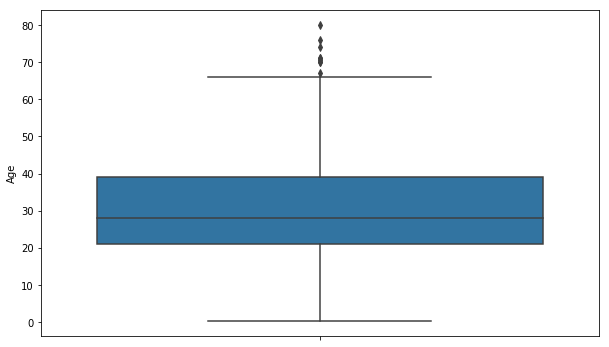

In [208]:
sns.boxplot(y='Age', data=titanic_data); 

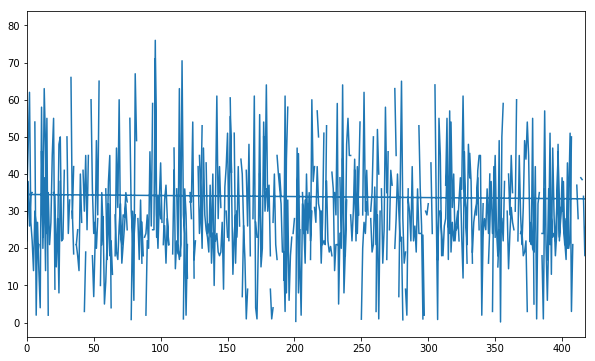

In [209]:
titanic_data['Age'].plot()

In [210]:
titanic_data.sort_values(by='Age').head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
354,0.17,NaN,S,20.5750,"Dean, Miss. Elizabeth Gladys Millvina""""",2,1246,3,female,1,NaN,C.A. 2315
201,0.33,NaN,S,14.4000,"Danbom, Master. Gilbert Sigvard Emanuel",2,1093,3,male,0,NaN,347080
803,0.42,NaN,C,8.5167,"Thomas, Master. Assad Alexander",1,804,3,male,0,1.0,2625
755,0.67,NaN,S,14.5000,"Hamalainen, Master. Viljo",1,756,2,male,1,1.0,250649
469,0.75,NaN,C,19.2583,"Baclini, Miss. Helene Barbara",1,470,3,female,2,1.0,2666


In [211]:
titanic_data['Prefix'] = [re.sub('[, .]', '',re.search(r', \w+.', name).group()) for name in titanic_data['Name']]
titanic_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [212]:
print(set(titanic_data['Prefix']))

{'the', 'Dona', 'Mme', 'Ms', 'Master', 'Mrs', 'Don', 'Miss', 'Dr', 'Sir', 'Col', 'Lady', 'Mlle', 'Rev', 'Mr', 'Capt', 'Major', 'Jonkheer'}


In [213]:
print(sorted(titanic_data[(titanic_data['Prefix'] == 'Master')]['Age'].unique()))

[0.33000000000000002, 0.41999999999999998, 0.67000000000000004, 0.75, 0.82999999999999996, 0.92000000000000004, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 11.0, nan, 8.0, 9.0, 10.0, 11.5, 12.0, 13.0, 14.5]


In [214]:
print(sorted(titanic_data[(titanic_data['Prefix'] == 'Miss')]['Age'].unique()))

[0.17000000000000001, 0.75, 0.92000000000000004, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 18.5, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.5, 31.0, 32.0, 33.0, 34.0, 36.0, 37.0, 39.0, 40.0, 41.0, 42.0, 45.0, 58.0, nan, 30.0, 32.5, 35.0, 38.0, 50.0, 54.0, 63.0]


Вывод: Master - мужчины в возрасте до 18 лет, Miss - женщины любого возраста. Отсутствующие данные с приставкой Master можно заполнить по среднему возрасту Master

In [215]:
titanic_data.reset_index(drop=True, inplace=True)

In [216]:
mean_master_age = titanic_data[titanic_data['Prefix'] == 'Master']['Age'].mean()
print('Средний возраст пасссажиров с приставкой Master: ', mean_master_age)
titanic_data.loc[(titanic_data['Age'].isnull()) & (titanic_data['Prefix'] == 'Master'), 'Age'] = mean_master_age
titanic_data.info()

Средний возраст пасссажиров с приставкой Master:  5.482641509433963
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1054 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Prefix         1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [217]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [218]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Prefix         1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


### Заполним пропуски в Embarked

In [219]:
titanic_data[titanic_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs


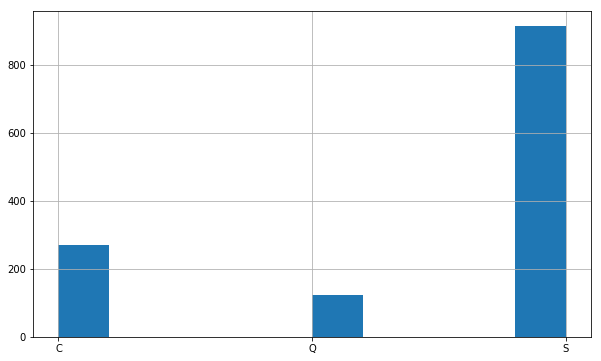

In [220]:
titanic_data['Embarked'].hist()

In [221]:
titanic_data.loc[titanic_data['Embarked'].isnull(), 'Embarked'] = 'S'

In [222]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### Заполним пропуски в Fare

In [223]:
titanic_data[titanic_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


In [224]:
titanic_data['Fare'].mean()

33.2954792813456

In [225]:
third_class_mean_fare = titanic_data[titanic_data['Pclass'] == 3]['Fare'].mean()
third_class_mean_fare

13.302888700564969

In [226]:
titanic_data.loc[titanic_data['Fare'].isnull(), 'Fare'] = third_class_mean_fare

In [227]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Prefix         1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


Данные заполнены для всех полей за исключением Cabin(пока не будем использовать для предсказания) и Survived - целевая переменная

# Создание решающего правила

### Правило по возрасту

In [228]:
age_effect = pd.Series(np.zeros(len(set(titanic_data.Age))),
                        index = sorted(set(titanic_data.Age)))
age_effect.head()

0.17    0.0
0.33    0.0
0.42    0.0
0.67    0.0
0.75    0.0
dtype: float64

In [229]:
def ret_next_mean(position, var_list):
    if position > (len(var_list) - 1):
        return np.nan
    if not np.isnan(var_list[position][1]):
        return var_list[position] 
    else:
        return ret_next_mean(position + 1, var_list) 

In [293]:
def age_survival(age):
    return titanic_data[(titanic_data['Age'] == age) & (titanic_data['Age'] != np.nan)]['Survived'].mean()

for ind in age_effect.index:
    age_effect[ind] = age_survival(ind)

age_list = list(age_effect.iteritems())
 
age_dict = {}

for i, a in enumerate(age_list):
    age_dict[age_list[i][0]] = ret_next_mean(i, age_list)[1]

age_dict

{0.17000000000000001: 1.0,
 0.33000000000000002: 1.0,
 0.41999999999999998: 1.0,
 0.67000000000000004: 1.0,
 0.75: 1.0,
 0.82999999999999996: 1.0,
 0.92000000000000004: 1.0,
 1.0: 0.7142857142857143,
 2.0: 0.29999999999999999,
 3.0: 0.83333333333333337,
 4.0: 0.69999999999999996,
 5.0: 1.0,
 5.4826415094339627: 0.5,
 6.0: 0.66666666666666663,
 7.0: 0.33333333333333331,
 8.0: 0.5,
 9.0: 0.25,
 10.0: 0.0,
 11.0: 0.25,
 11.5: 1.0,
 12.0: 1.0,
 13.0: 1.0,
 14.0: 0.5,
 14.5: 0.0,
 15.0: 0.80000000000000004,
 16.0: 0.35294117647058826,
 17.0: 0.46153846153846156,
 18.0: 0.34615384615384615,
 18.5: 0.35999999999999999,
 19.0: 0.35999999999999999,
 20.0: 0.20000000000000001,
 20.5: 0.0,
 21.0: 0.20833333333333334,
 22.0: 0.40740740740740738,
 22.5: 0.33333333333333331,
 23.0: 0.33333333333333331,
 23.5: 0.0,
 24.0: 0.5,
 24.5: 0.0,
 25.0: 0.2608695652173913,
 26.0: 0.33333333333333331,
 26.5: 0.61111111111111116,
 27.0: 0.61111111111111116,
 28.0: 0.28000000000000003,
 28.5: 0.0,
 29.0: 0.4000

### Правило по полу

In [291]:
def sex_survival(sex):
    return titanic_data[titanic_data['Sex'] == sex]['Survived'].mean()

sex_dict = {
    'male' : sex_survival('male'),
    'female' : sex_survival('female')
}
sex_dict

{'female': 0.7420382165605095, 'male': 0.18890814558058924}

### Правило SibSp

In [232]:
def sibsp_survival(sibsp):
    return titanic_data[titanic_data['SibSp'] == sibsp]['Survived'].mean()

sibsp_dict = {}

for sibsp in set(titanic_data.SibSp):
    sibsp_dict[str(sibsp)] = sibsp_survival(sibsp)

sibsp_dict
    
    

{'0': 0.34539473684210525,
 '1': 0.5358851674641149,
 '2': 0.4642857142857143,
 '3': 0.25,
 '4': 0.16666666666666666,
 '5': 0.0,
 '8': 0.0}

### Наблюдение

Семьи с численностью 5 и 8 человек - выживаемость 0%. Изучим поближе семьи

In [233]:
titanic_data[titanic_data['SibSp'] == 8]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix
159,5.482642,NaN,S,69.55,"Sage, Master. Thomas Henry",2,160,3,male,8,0.0,CA. 2343,Master
180,29.695950,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,181,3,female,8,0.0,CA. 2343,Miss
201,29.695950,NaN,S,69.55,"Sage, Mr. Frederick",2,202,3,male,8,0.0,CA. 2343,Mr
324,29.695950,NaN,S,69.55,"Sage, Mr. George John Jr",2,325,3,male,8,0.0,CA. 2343,Mr
792,29.695950,NaN,S,69.55,"Sage, Miss. Stella Anna",2,793,3,female,8,0.0,CA. 2343,Miss
846,29.695950,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,847,3,male,8,0.0,CA. 2343,Mr
863,29.695950,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,864,3,female,8,0.0,CA. 2343,Miss
1079,29.695950,NaN,S,69.55,"Sage, Miss. Ada",2,1080,3,female,8,NaN,CA. 2343,Miss
1251,14.500000,NaN,S,69.55,"Sage, Master. William Henry",2,1252,3,male,8,NaN,CA. 2343,Master


In [234]:
titanic_data[titanic_data['SibSp'] == 5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix
59,11.0,NaN,S,46.9,"Goodwin, Master. William Frederick",2,60,3,male,5,0.0,CA 2144,Master
71,16.0,NaN,S,46.9,"Goodwin, Miss. Lillian Amy",2,72,3,female,5,0.0,CA 2144,Miss
386,1.0,NaN,S,46.9,"Goodwin, Master. Sidney Leonard",2,387,3,male,5,0.0,CA 2144,Master
480,9.0,NaN,S,46.9,"Goodwin, Master. Harold Victor",2,481,3,male,5,0.0,CA 2144,Master
683,14.0,NaN,S,46.9,"Goodwin, Mr. Charles Edward",2,684,3,male,5,0.0,CA 2144,Mr
1031,10.0,NaN,S,46.9,"Goodwin, Miss. Jessie Allis",2,1032,3,female,5,NaN,CA 2144,Miss


На корабле присутствуют 2 семьи: Goodwin, Sage. Никто из них не выжил в тренировочной выборке. Определить их кроме прочего можно
по фамилии, и номеру билета.

In [235]:
# Выведем данные по ним
titanic_data[titanic_data['Ticket'] == 'CA 2144']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix
59,11.0,NaN,S,46.9,"Goodwin, Master. William Frederick",2,60,3,male,5,0.0,CA 2144,Master
71,16.0,NaN,S,46.9,"Goodwin, Miss. Lillian Amy",2,72,3,female,5,0.0,CA 2144,Miss
386,1.0,NaN,S,46.9,"Goodwin, Master. Sidney Leonard",2,387,3,male,5,0.0,CA 2144,Master
480,9.0,NaN,S,46.9,"Goodwin, Master. Harold Victor",2,481,3,male,5,0.0,CA 2144,Master
678,43.0,NaN,S,46.9,"Goodwin, Mrs. Frederick (Augusta Tyler)",6,679,3,female,1,0.0,CA 2144,Mrs
683,14.0,NaN,S,46.9,"Goodwin, Mr. Charles Edward",2,684,3,male,5,0.0,CA 2144,Mr
1030,40.0,NaN,S,46.9,"Goodwin, Mr. Charles Frederick",6,1031,3,male,1,NaN,CA 2144,Mr
1031,10.0,NaN,S,46.9,"Goodwin, Miss. Jessie Allis",2,1032,3,female,5,NaN,CA 2144,Miss


In [236]:
titanic_data[titanic_data['Ticket'] == 'CA. 2343']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix
159,5.482642,NaN,S,69.55,"Sage, Master. Thomas Henry",2,160,3,male,8,0.0,CA. 2343,Master
180,29.695950,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,181,3,female,8,0.0,CA. 2343,Miss
201,29.695950,NaN,S,69.55,"Sage, Mr. Frederick",2,202,3,male,8,0.0,CA. 2343,Mr
324,29.695950,NaN,S,69.55,"Sage, Mr. George John Jr",2,325,3,male,8,0.0,CA. 2343,Mr
792,29.695950,NaN,S,69.55,"Sage, Miss. Stella Anna",2,793,3,female,8,0.0,CA. 2343,Miss
846,29.695950,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,847,3,male,8,0.0,CA. 2343,Mr
863,29.695950,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,864,3,female,8,0.0,CA. 2343,Miss
1079,29.695950,NaN,S,69.55,"Sage, Miss. Ada",2,1080,3,female,8,NaN,CA. 2343,Miss
1233,29.695950,NaN,S,69.55,"Sage, Mr. John George",9,1234,3,male,1,NaN,CA. 2343,Mr
1251,14.500000,NaN,S,69.55,"Sage, Master. William Henry",2,1252,3,male,8,NaN,CA. 2343,Master


Выводы: скорее всего все члены обеих семей утонули. Добавить данные номера билетов в правило (Survived = 0). Можно попробовать отследить наличие и состав семей через номера билетов.

Если добавить правило по данным двум семьям правила то оно сработает только на тестовой выборке, в остальном от него мало пользы (члены данных семей полностью перечислены в обеих выборках). Это не правило, это наблюдение для данных случаев.

In [237]:
collections.Counter(titanic_data['Ticket'])

Counter({'110152': 3,
         '110413': 3,
         '110465': 2,
         '110469': 1,
         '110489': 1,
         '110564': 1,
         '110813': 2,
         '111163': 1,
         '111240': 1,
         '111320': 1,
         '111361': 2,
         '111369': 1,
         '111426': 1,
         '111427': 1,
         '111428': 1,
         '112050': 1,
         '112051': 1,
         '112052': 1,
         '112053': 1,
         '112058': 2,
         '112059': 1,
         '112277': 1,
         '112377': 1,
         '112378': 2,
         '112379': 1,
         '112901': 1,
         '113028': 1,
         '113038': 1,
         '113043': 1,
         '113044': 1,
         '113050': 1,
         '113051': 1,
         '113054': 1,
         '113055': 1,
         '113056': 1,
         '113059': 2,
         '113501': 1,
         '113503': 5,
         '113505': 2,
         '113509': 2,
         '113510': 1,
         '113514': 1,
         '113572': 2,
         '113760': 4,
         '113767': 1,
         '

In [238]:
titanic_data[titanic_data['Ticket'] == '373450']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix
4,35.0,NaN,S,8.05,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


### Наблюдение

Билет соответствует цене билета. 

Есть несколько видов билетов с буквенными обозначениями и билеты только с цифровыми обозначениями. Попробовать 
разделить на группы отследить выживаемость. 

Отследить выживаемость по фамилии/национальности?


In [251]:
def get_ticket_group(ticket):
    ticket_group = 'number'
    if re.search(r'\D', ticket):
        ticket_group = ticket.split(' ')[0]
    return ticket_group

titanic_data['Ticket_type'] = [get_ticket_group(ticket) for ticket in titanic_data['Ticket']]

In [252]:
titanic_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix,Ticket_type
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,A/5
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,PC
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,STON/O2.
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,number
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,number
5,29.695950,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,number
6,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,number
7,2.000000,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,number
8,27.000000,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,number
9,14.000000,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,number


In [279]:
ticket_type_surv = pd.crosstab(titanic_data['Ticket_type'], titanic_data['Survived']) #.apply(lambda r: r/r.sum(), axis=1)
ticket_type_surv

Survived,0.0,1.0
Ticket_type,,
A./5.,2,0
A.5.,2,0
A/4,3,0
A/4.,3,0
A/5,9,1
A/5.,6,1
A/S,1,0
A4.,1,0
C,3,2


In [280]:
ticket_type_surv.apply(lambda r: r/r.sum(), axis=1).sort_values(by=1.0, ascending=False)

Survived,0.0,1.0
Ticket_type,,
SW/PP,0.000000,1.000000
SC,0.000000,1.000000
S.W./PP,0.000000,1.000000
SO/C,0.000000,1.000000
F.C.C.,0.200000,0.800000
PP,0.333333,0.666667
SC/AH,0.333333,0.666667
PC,0.350000,0.650000
P/PP,0.500000,0.500000


Из таблицы видно что наибольшая выживаемость у пассажиров с номером с кодировкой: PC погибло: 21 выжило: 39. Выживаемость 65% -
показатель намного выше общей выживаемости и выживаемости пассажиров с билетами без текстовой кодировки (38%). 
Возможно случайность и кодировка ничего не значит, но есть предположение что кодировка привязана к каюте (классу), например расположение рядом со шлюпками, части корабля оставшейся над водой?

In [284]:
print(collections.Counter(titanic_data[titanic_data['Ticket_type'] == 'PC']['Cabin']))

Counter({nan: 25, 'B57 B59 B63 B66': 5, 'B58 B60': 3, 'C85': 2, 'B78': 2, 'D33': 2, 'D10 D12': 2, 'C125': 2, 'C65': 2, 'C32': 2, 'B35': 2, 'E25': 2, 'C86': 2, 'B51 B53 B55': 2, 'C62 C64': 2, 'E24': 2, 'D28': 2, 'C55 C57': 2, 'A5': 1, 'B86': 1, 'C49': 1, 'B4': 1, 'B80': 1, 'C99': 1, 'C118': 1, 'E36': 1, 'C91': 1, 'C95': 1, 'A20': 1, 'D49': 1, 'C90': 1, 'C45': 1, 'B101': 1, 'B82 B84': 1, 'E49': 1, 'A24': 1, 'A9': 1, 'B61': 1, 'D43': 1, 'A29': 1, 'C97': 1, 'B10': 1, 'E45': 1, 'E52': 1, 'A11': 1, 'A18': 1, 'C105': 1})


In [286]:
cabin_ticket_type_dict = {}
for cabin in set(titanic_data[titanic_data['Ticket_type'] == 'PC']['Cabin']):
    cabin_ticket_type_dict[cabin] = set(titanic_data[titanic_data['Cabin'] == cabin]['Ticket_type'])
cabin_ticket_type_dict

{nan: set(),
 'B58 B60': {'PC'},
 'E45': {'PC'},
 'B57 B59 B63 B66': {'PC'},
 'C90': {'PC'},
 'B4': {'PC'},
 'D28': {'PC'},
 'E36': {'PC'},
 'A29': {'PC'},
 'D33': {'PC'},
 'B51 B53 B55': {'PC', 'number'},
 'C32': {'PC'},
 'C125': {'PC'},
 'B86': {'PC'},
 'B101': {'PC'},
 'C95': {'PC'},
 'C91': {'PC'},
 'C65': {'PC'},
 'E25': {'PC'},
 'B80': {'PC'},
 'C99': {'PC'},
 'C86': {'PC'},
 'E52': {'PC'},
 'C118': {'PC'},
 'E24': {'PC'},
 'B61': {'PC'},
 'C45': {'PC'},
 'C97': {'PC'},
 'B10': {'PC'},
 'A5': {'PC'},
 'B78': {'PC'},
 'A24': {'PC'},
 'A18': {'PC'},
 'C62 C64': {'PC'},
 'C105': {'PC'},
 'D49': {'PC'},
 'E49': {'PC'},
 'D43': {'PC'},
 'B35': {'PC'},
 'C49': {'PC'},
 'B82 B84': {'PC'},
 'C55 C57': {'PC'},
 'A20': {'PC'},
 'A11': {'PC'},
 'A9': {'PC'},
 'D10 D12': {'PC'},
 'C85': {'PC'}}

Гипотеза подтвердилась: буквенные обозначения на билетах - привязаны к номерам кают. Возможно я что то не так делаю?
Пока не знаю как это использовать. 
Вероятно можно было бы выделить типы кают и дозаполнить их из номеров билетов.

In [296]:
collections.Counter(titanic_data[titanic_data['Ticket_type'] == 'PC']['Pclass'])

Counter({1: 92})

К тому же все пассажиры из 1 класса

### Продолжим создавать решающее правило

### Правило Parch

In [141]:
def parch_survival(parch):
    return titanic_data[titanic_data['Parch'] == parch]['Survived'].mean()

parch_dict = {}

for parch in set(titanic_data.Parch):
    parch_dict[str(parch)] = parch_survival(parch)

parch_dict

{'0': 0.34365781710914456,
 '1': 0.5508474576271186,
 '2': 0.5,
 '3': 0.6,
 '4': 0.0,
 '5': 0.2,
 '6': 0.0,
 '9': nan}

In [142]:
titanic_data[titanic_data['Parch'] == parch]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix
1233,29.69595,NaN,S,69.55,"Sage, Mr. John George",9,1234,3,male,1,NaN,CA. 2343,Mr
1256,29.69595,NaN,S,69.55,"Sage, Mrs. John (Annie Bullen)",9,1257,3,female,1,NaN,CA. 2343,Mrs


Пассажиры у которых 9 детей это супруги из ранее рассмотренной семьи Sage. 7 человек из них утонули, 
статус четверых необходимо определить. Из имеющейся информации вероятно так же погибли. (Возможно необходимо выяснить среднюю выживаемость членов семей?)

In [290]:
parch_dict['9'] = 0.0
parch_dict

{'0': 0.34365781710914456,
 '1': 0.5508474576271186,
 '2': 0.5,
 '3': 0.6,
 '4': 0.0,
 '5': 0.2,
 '6': 0.0,
 '9': 0.0}

### Правило Pclass

In [294]:
def pclass_survival(pclass):
    return titanic_data[titanic_data['Pclass'] == pclass]['Survived'].mean()

pclass_dict = {}

for pclass in set(titanic_data.Pclass):
    pclass_dict[str(pclass)] = pclass_survival(pclass)

pclass_dict

{'1': 0.6296296296296297, '2': 0.47282608695652173, '3': 0.24236252545824846}

## Создадим функцию и заполним Survived в тестовой выборке

In [298]:
titanic_my_test = titanic_data[titanic_data['Survived'].isnull()]
titanic_my_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Prefix,Ticket_type
891,34.500000,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,number
892,47.000000,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,number
893,62.000000,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,number
894,27.000000,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,number
895,22.000000,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,number
896,14.000000,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538,Mr,number
897,30.000000,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972,Miss,number
898,26.000000,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738,Mr,number
899,18.000000,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657,Mrs,number
900,21.000000,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,NaN,A/4 48871,Mr,A/4


In [311]:
print(titanic_my_test.ix[891,['Age']])
for index in titanic_my_test.index:
    age = age_dict[titanic_my_test.ix[891,['Age']]]
    print(titanic_my_test.iloc[index, 'Age'])

Age    34.5
Name: 891, dtype: object


TypeError: 'Series' objects are mutable, thus they cannot be hashed